# **ESERCIZI LEZIONE 6**

### ***1. DISTRIBUZIONE DI PROBABILITA'***

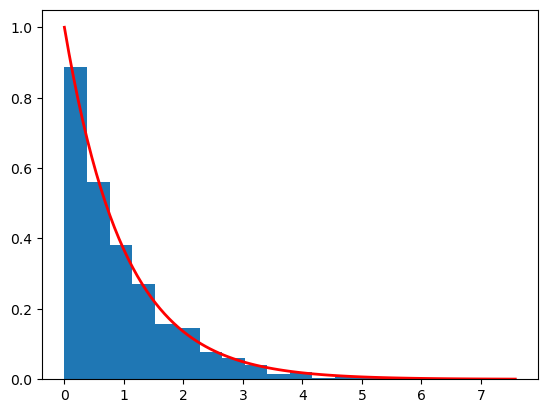

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp
import math

parametro_forma = 1 

distribuzione = sp.stats.gamma(parametro_forma) 

valori_casuali = distribuzione.rvs(1000)

plt.hist(valori_casuali, bins=20, density=True)

x = np.linspace(0, max(valori_casuali), 100)

pdf_valori = distribuzione.pdf(x)

plt.plot(x, pdf_valori, 'r-', lw=2, label='PDF della Distribuzione Gamma')

plt.show()

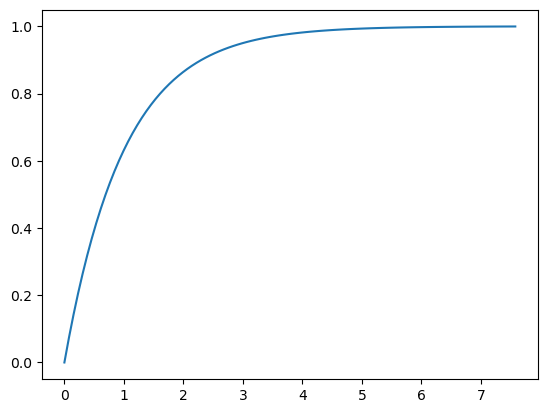

In [16]:
parametri_stimati = sp.stats.gamma.fit(valori_casuali)
parametro_forma_stimato = parametri_stimati[0]

plt.plot(x, distribuzione.cdf(x))
plt.show()

varianza = distribuzione.var()

### ***2. FITTA I DATI***

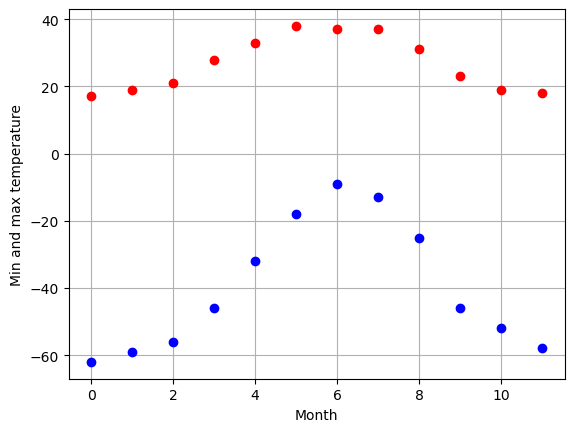

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from model_optimise import FitTrendModel

values_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
values_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(12)

plt.plot(months, values_max, "ro")
plt.plot(months,values_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")
plt.grid(True)
plt.show()

C:\Users\barel\AppData\Local\Temp\ipykernel_15680\21100842.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


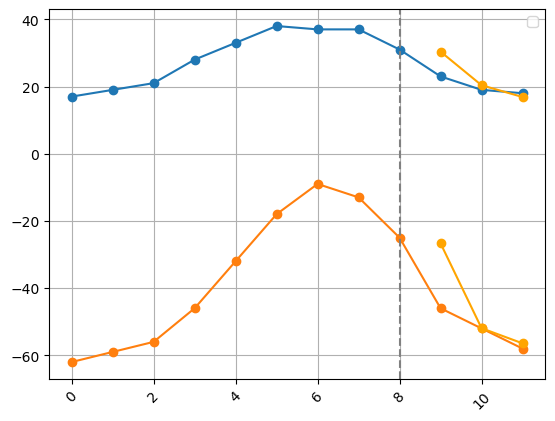

In [18]:
window = 3
split_index = 9

fit_values_max = values_max[:split_index]
fit_values_min = values_min[:split_index]

test_values_max = values_max[split_index:]
test_values_min = values_min[split_index:]

data_max = values_max[split_index - window:]
data_min = values_min[split_index - window:]

fit_trend_model_max = FitTrendModel(window=window)
fit_trend_model_min = FitTrendModel(window=window)

fit_trend_model_max.fit(fit_values_max)
fit_trend_model_min.fit(fit_values_min)

fit_pred_data_max = []
fit_pred_data_min = []

predicted_values_max = list(map(float, data_max[:window]))
predicted_values_min = list(map(float, data_min[:window]))

for i in range(len(data_max) - window):
    prediction = fit_trend_model_max.predict(predicted_values_max)
    fit_pred_data_max.append(prediction)
    del predicted_values_max[0]
    predicted_values_max.append(float(data_max[i + window]))

for i in range(len(data_min) - window):
    prediction = fit_trend_model_min.predict(predicted_values_min)
    fit_pred_data_min.append(prediction)
    del predicted_values_min[0]
    predicted_values_min.append(float(data_min[i + window]))

x_max = list(range(len(values_max)))
x_min = list(range(len(values_min)))

x_fit_max = list(range(split_index, split_index + len(fit_pred_data_max)))
x_fit_min = list(range(split_index, split_index + len(fit_pred_data_min)))

plt.plot(x_max, values_max, marker='o', linestyle='-')
plt.plot(x_min, values_min, marker='o', linestyle='-')

plt.plot(x_fit_max, fit_pred_data_max, color='orange', marker='o', linestyle='-')
plt.plot(x_fit_min, fit_pred_data_min, color='orange', marker='o', linestyle='-')

plt.axvline(split_index - 1, color='gray', linestyle='--')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [19]:
values_max_py = [float(x) for x in values_max]
values_min_py = [float(x) for x in values_min]

mae_fit_trend_max = fit_trend_model_max.evaluate(values_max_py)
rmse_fit_trend_max = fit_trend_model_max.evaluate_rmse(values_max_py)

mae_fit_trend_min = fit_trend_model_min.evaluate(values_min_py)
rmse_fit_trend_min = fit_trend_model_min.evaluate_rmse(values_min_py)

print(f"FitTrendModel → MAE Max: {mae_fit_trend_max:.2f}")
print(f"FitTrendModel → RMSE Max: {rmse_fit_trend_max:.2f}")
print(f"FitTrendModel → MAE Min: {mae_fit_trend_min:.2f}")
print(f"FitTrendModel → RMSE Min: {rmse_fit_trend_min:.2f}")

FitTrendModel → MAE Max: 0.57
FitTrendModel → RMSE Max: 0.57
FitTrendModel → MAE Min: 2.75
FitTrendModel → RMSE Min: 2.75


### ***3. MODELLO DI REGRESSIONE LINEARE DEI SEGUENTI DATI***